<a href="https://colab.research.google.com/github/Frenchyy1/test/blob/master/Currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://pypi.org/project/CurrencyConverter/

In [0]:
pip install currencyconverter

     |████████████████████████████████| 501kB 3.4MB/s 
  Created wheel for currencyconverter: filename=CurrencyConverter-0.14.1-cp36-none-any.whl size=496823 sha256=95af36323c51de0b33bcaab682b3ff07c0ca3855f8affe6770b1a6101d08dfb7
  Stored in directory: /root/.cache/pip/wheels/1b/a3/5b/7343291198e8ec56445a41f553e9d5cd3b3e6abadf9bd1e11c
Successfully built currencyconverter


In [0]:
from currency_converter import CurrencyConverter

In [0]:
# Load the packaged data (might not be up to date)
#c = CurrencyConverter()

# Load the up to date full history
c = CurrencyConverter('http://www.ecb.int/stats/eurofxref/eurofxref-hist.zip')

# Load only the latest rates (single day data source)
#c = CurrencyConverter('http://www.ecb.europa.eu/stats/eurofxref/eurofxref.zip')

# Load your custom file
#c = CurrencyConverter('./path/to/currency/file.csv')

In [0]:
from datetime import date
c.convert(1, 'EUR', 'ILS', date=date(2020, 4, 3))

3.9267

In [0]:
first_date, last_date = c.bounds['ILS']
print(first_date, last_date)

2011-01-03 2020-04-03


In [0]:
import pandas as pd
from datetime import datetime,timedelta
c = CurrencyConverter(fallback_on_missing_rate=True)
last_date=date(2020, 2, 2)

In [0]:
date1 = first_date
date2 = last_date
day = timedelta(days=1)
data=[]
while date1 <= date2:
    #print(date1)
    date1 = date1 + day
    a=c.convert(1, 'EUR', 'ILS', date=date1)
    a_dictionary = {'Date':date1,'Cours':a}
    data.append(a_dictionary)

In [0]:
df = pd.DataFrame(data)

In [0]:
from matplotlib import dates
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
def tsplot(df, date, axy):
  ax=sns.lineplot(data=df, x=date, y=axy, marker='o')
  #ax.set(xticks=df.Date.values) Pour 1 libellé pour chaque point x
  ax.tick_params(rotation=45)
  plt.xlabel('Evolution', fontsize=20)
  plt.title('Taux de change Shekel - Euro')
  # Define the date format
  date_form = DateFormatter("%y-%m")
  ax.xaxis.set_major_formatter(date_form)
  # Ensure a major tick for each week using (interval=1) 
  ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
  xposition = [pd.to_datetime('2020-01-01'), pd.to_datetime('2019-01-01'), pd.to_datetime('2018-01-01'),pd.to_datetime('2017-01-01'), pd.to_datetime('2016-01-01'),pd.to_datetime('2015-01-01')]
  for xc in xposition:
      ax.axvline(x=xc, color='k', linestyle='dotted')

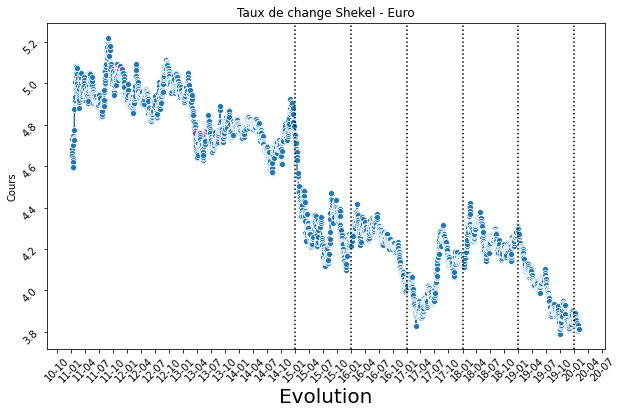

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
tsplot(df, 'Date', 'Cours')

In [0]:
import datetime
today = datetime.date.today()
first = today.replace(day=1)
start_date = first - pd.offsets.MonthBegin(12)
mask = (df['Date'] > start_date)
dflast12=df.loc[mask]

In [0]:
from matplotlib import dates
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
def tsplot(df, date, axy):
  ax=sns.lineplot(data=df, x=date, y=axy, marker='o')
  #ax.set(xticks=df.Date.values) Pour 1 libellé pour chaque point x
  ax.tick_params(rotation=45)
  plt.xlabel('Evolution', fontsize=20)
  plt.title('Taux de change Shekel - Euro')
  # Define the date format
  date_form = DateFormatter("%y-%m")
  ax.xaxis.set_major_formatter(date_form)
  # Ensure a major tick for each week using (interval=1) 
  ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

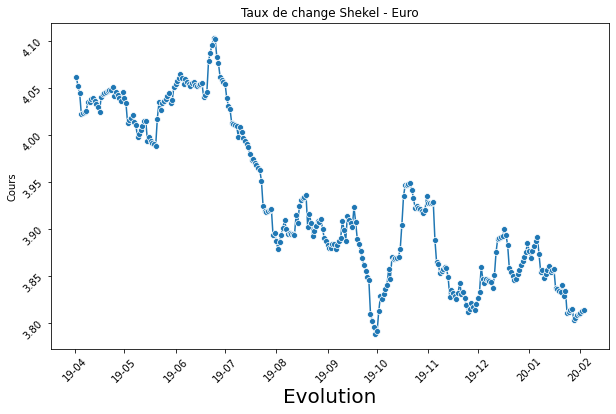

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
tsplot(dflast12, 'Date', 'Cours')